<a href="https://colab.research.google.com/github/Sahilpardeshi1/Seoul-bike-sharing-demand-prediction/blob/main/Bike_sharing_demand_prediction_by_sahil_pardeshi_for_supervised_ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [7]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path= "/content/drive/MyDrive/SeoulBikeData.csv"

In [4]:
# Loading the csv File

bike_df = pd.read_csv(path,  encoding= 'unicode_escape')
bike_df.head() # head of the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_df.shape #Looking at the shape of the dataset

(8760, 14)

In [6]:
bike_df.info()  #checks the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **Preprocessing the dataset**




In [8]:
#Let's count how many missing values we have

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###**Above result says that there are no missing values in the data thankfully**

# **Duplicate values**




In [9]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.**

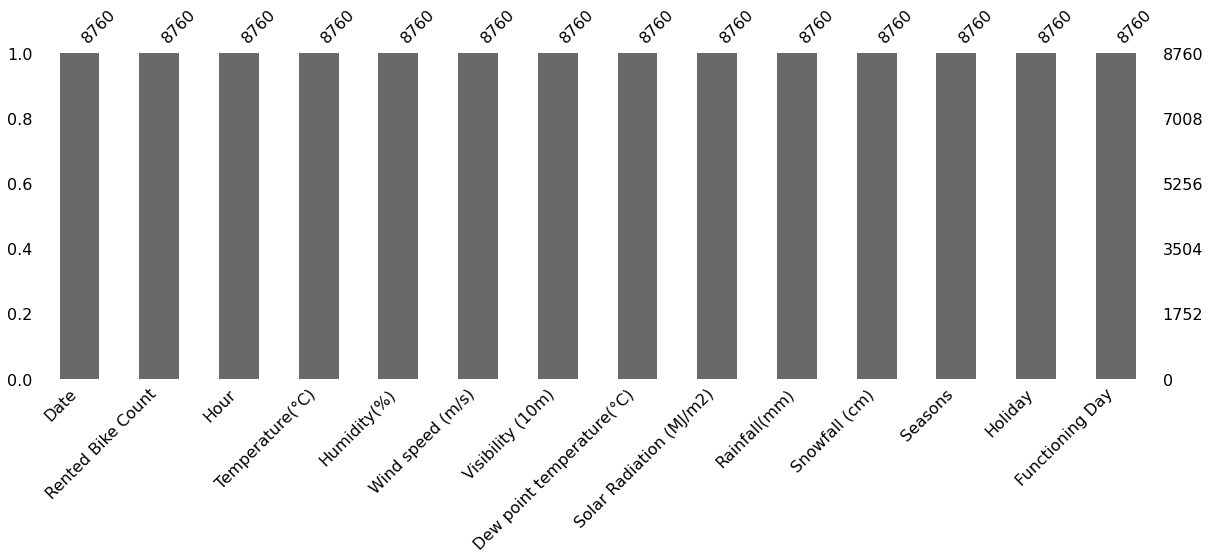

In [10]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(bike_df,figsize = (20,6))

In [11]:
#Looking for the description of the dataset to get insights of the data

bike_df.describe().transpose() #Statistical aspect of the dataframe

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# **Features description**
**Breakdown of Our Features:**

**Date :** The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count :** Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C):** Temperature in Celsius, type : Float

**Humidity(%):** Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C):** Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2):** Sun contribution, type : Float

**Rainfall(mm):** Amount of raining in mm, type : Float

**Snowfall (cm):** Amount of snowing in cm, type : Float

**Seasons:** Season of the year, type : str, there are only 4 season's in data .

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

In [12]:
# finding the type of data of 'Date' column

bike_df['Date'].dtype

dtype('O')

In [13]:
# converting string format of 'Date' column into date-time format

bike_df['Date'] = pd.to_datetime(bike_df['Date'],format='%d/%m/%Y') # breaking the date column
bike_df['Date'].dtype

dtype('<M8[ns]')

In [14]:
bike_df['year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df['Dayofweek'] = bike_df['Date'].dt.weekday

In [15]:
# replace month number into words for better understanding

bike_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [16]:
# replace dayofweek number into words for better understanding

bike_df['Dayofweek'].replace([0,1,2,3,4,5,6],['Mon','Tues','Wed','Thur','Fri','Sat','Sun'],inplace=True)

In [17]:
# let's see the head of the data now

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,Dayofweek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri


# **Performing EDA on the dataset**
* **An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.**



In [18]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

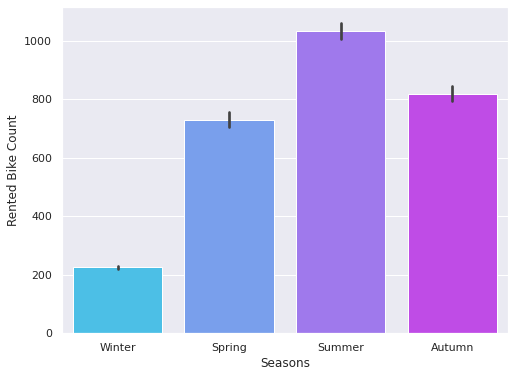

In [19]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.barplot(bike_df['Seasons'],bike_df['Rented Bike Count'],palette='cool')

**conclusions from above pie chart:**

**1.most bikes have been rented in the summer season.**

**2.least bike rent count is in winter season.**

**3.autumn and spring seasons have almost equal amounts of bike rent count.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

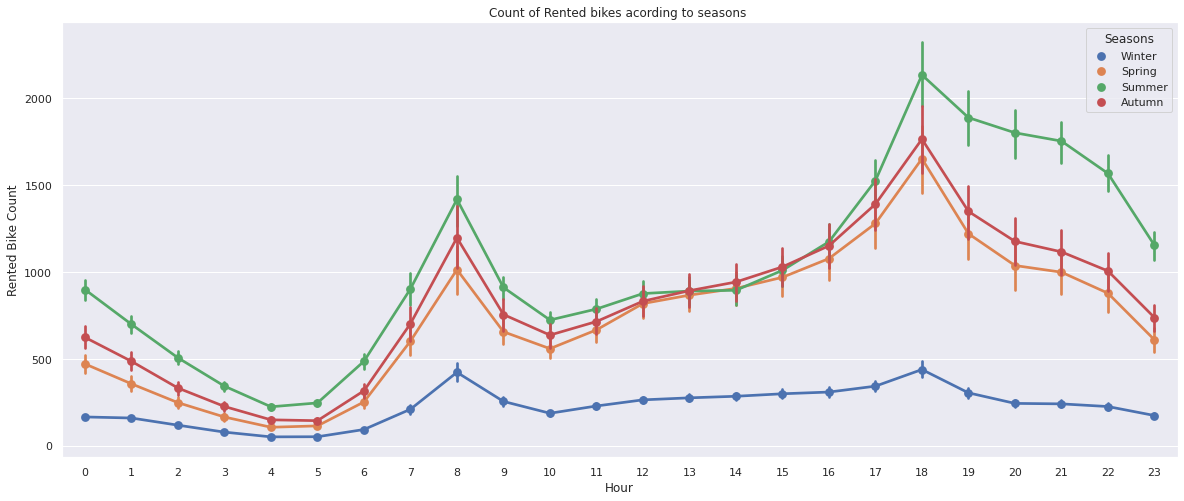

In [20]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

In [21]:
bike_df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

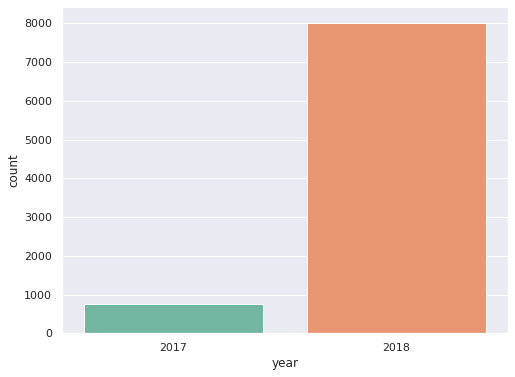

In [22]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'year', data = bike_df,palette='Set2')

**Above plot shows that most of the bikes have been rented in the year 2018.**

In [23]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = bike_df.groupby('Holiday').sum()['Rented Bike Count']

In [24]:
df_hol

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

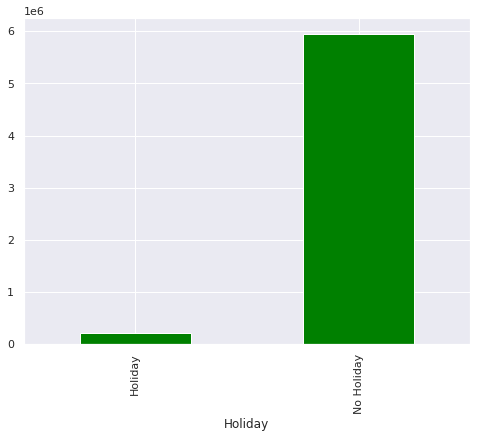

In [25]:
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
df_hol.plot(kind='bar',color = 'green')

**Above plot shows that most of the bikes have been rented on working days.**

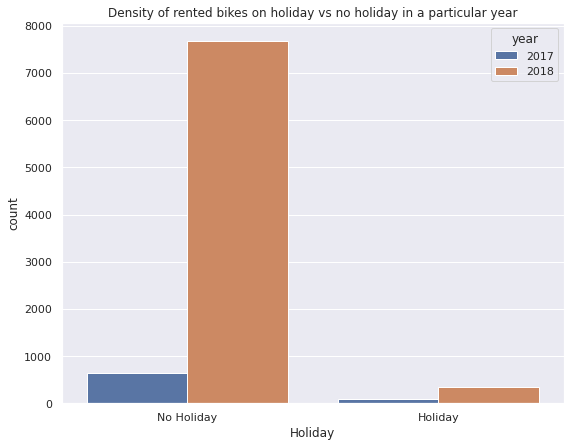

In [26]:
# bikes rented on type of day in each year

plt.figure(figsize=(9,7))
sns.countplot(x='Holiday', hue = 'year', data= bike_df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()

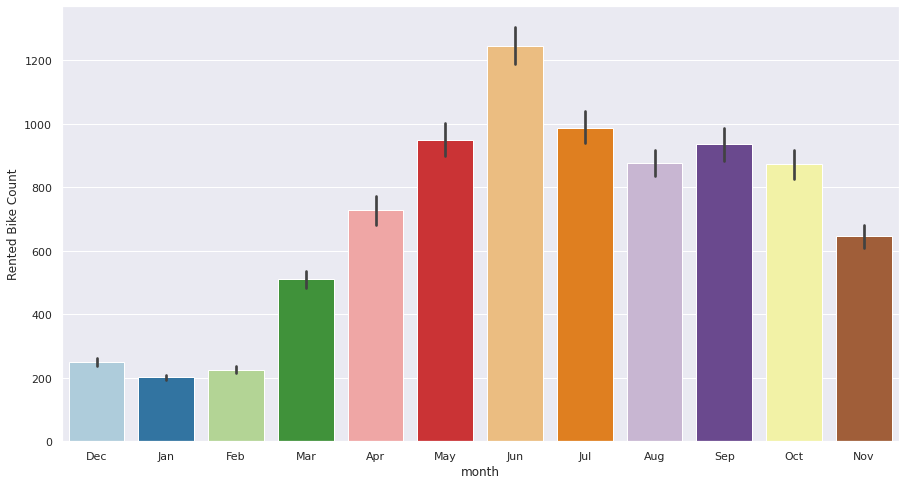

In [27]:
plt.figure(figsize=(15,8))
sns.barplot('month','Rented Bike Count',data=bike_df, palette='Paired')

In [28]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

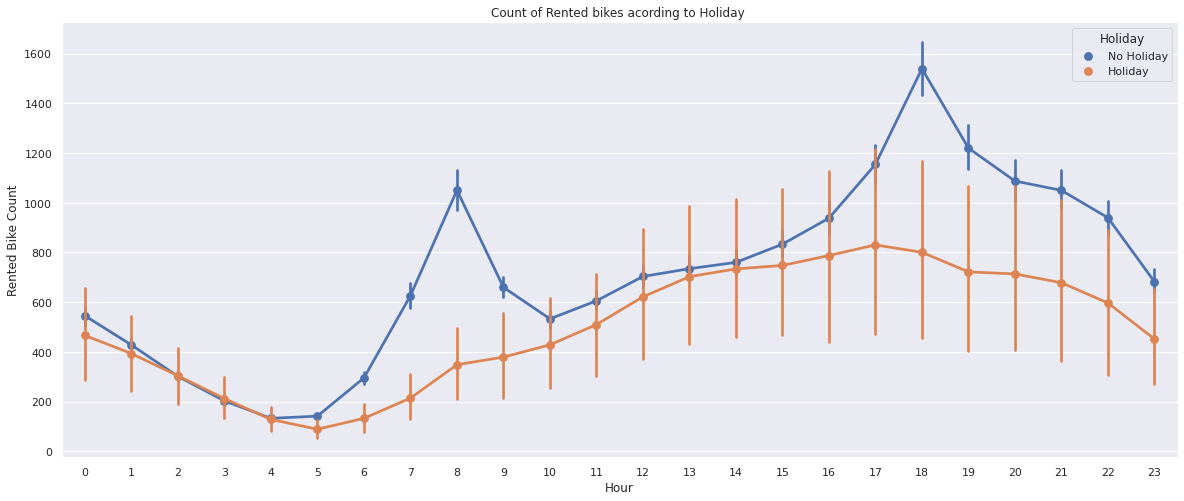

In [29]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

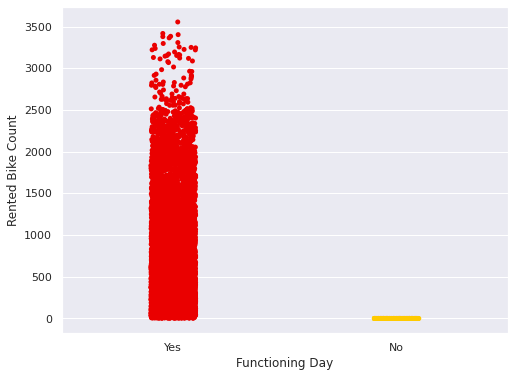

In [30]:
# showing the fuctioning day on rented bike count

plt.figure(figsize=(8,6))
sns.stripplot(bike_df['Functioning Day'],bike_df['Rented Bike Count'],jitter=True,palette='hot')

**Above plot show that bike was rented when there is more fuctioning day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

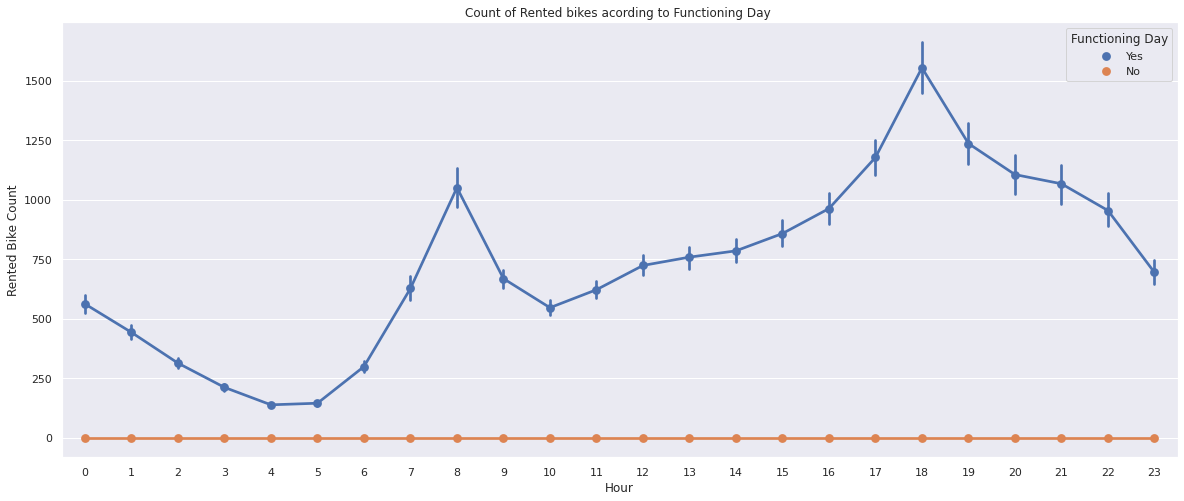

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

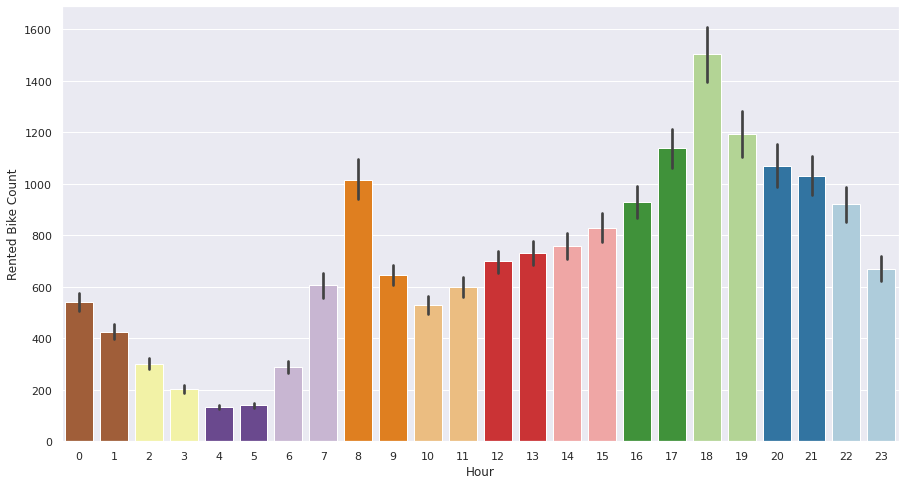

In [32]:
# how much hour are bike was rented

plt.figure(figsize=(15,8))
sns.barplot('Hour','Rented Bike Count', data = bike_df,palette='Paired_r')

* **Above plot show that the bike was rented mostly on morning and evening time**.**This is because people not having personal vehicle, commuting to offices and schools tend to rent bikes.**
* **generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

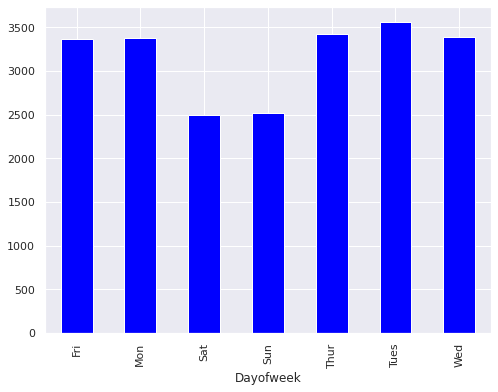

In [33]:
#showing on which day the bike was rented most

plt.figure(figsize=(8,6))
bike_df.groupby('Dayofweek')['Rented Bike Count'].max().plot(kind='bar',color = 'blue')

**Above graph shows that most of the bike rented on weekdays and less on weekends**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

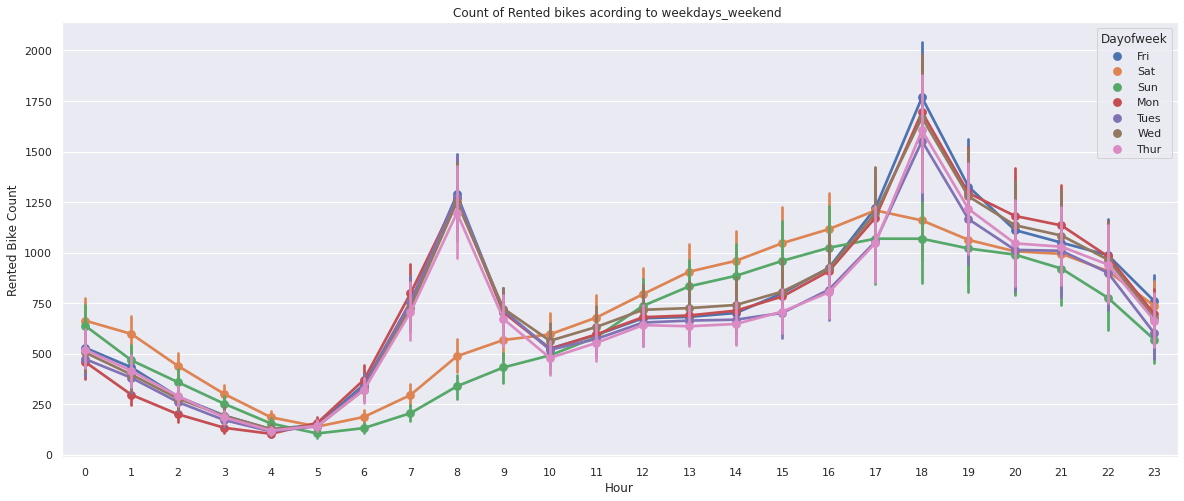

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue=bike_df['Dayofweek'],ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

# **Analyze of Numerical variables**
##Analyze of Numerical variables distplots

In [35]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())

In [36]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)

In [37]:
df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


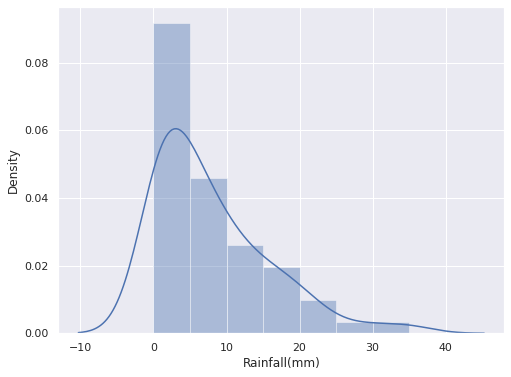

In [38]:
# plot showing distribution of bike rentals according to rainfall intensity

plt.figure(figsize=(8,6))
sns.distplot(df_rain['Rainfall(mm)'])

**Above plot shows that people tend to rent bikes when there is no or less rainfall.**

In [39]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())

In [40]:
df_snow.reset_index(inplace=True)

In [41]:
df_snow.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


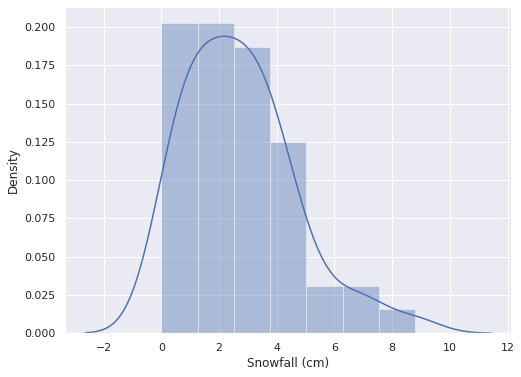

In [42]:
# plot showing distribution of bike rentals according to snowfall intensity

plt.figure(figsize=(8,6))
sns.distplot(df_snow['Snowfall (cm)'])

**Above plot shows that people tend to rent bikes when there is no or less snowfall.**

In [43]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_temp = pd.DataFrame(bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

In [44]:
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


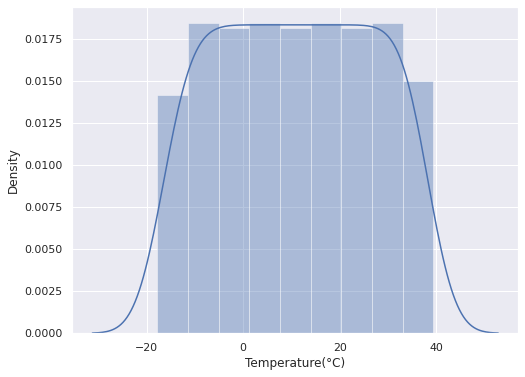

In [45]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(df_temp['Temperature(°C)'])

**Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.**

In [46]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(bike_df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

In [47]:
df_visi.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


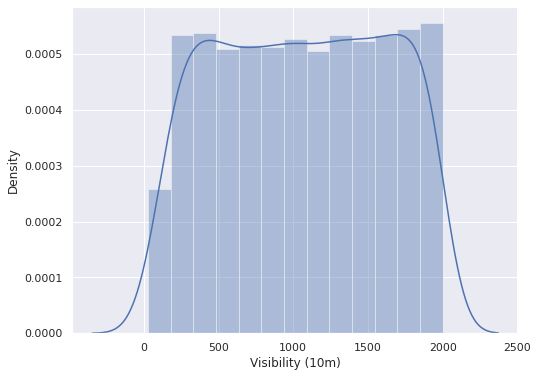

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility (10m)'])

**Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.**

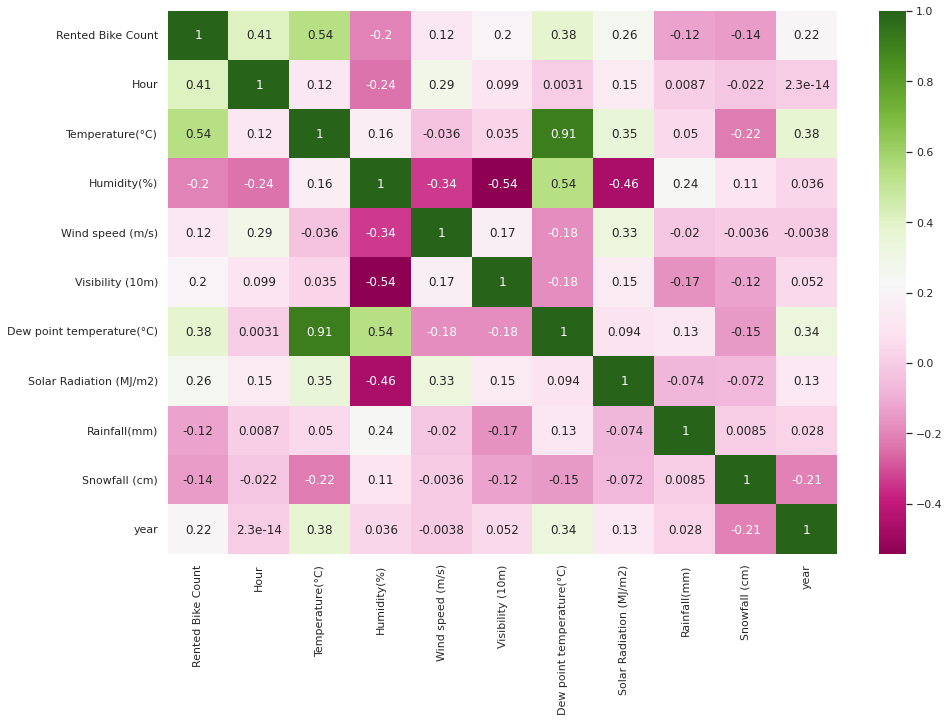

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(),cmap='PiYG',annot=True)

# **Removing outliers**

In [ ]:
# finding the inter-quartile range 

Q1 = bike_df.quantile(0.25)
Q3 = bike_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
dtype: float64


In [ ]:
# listing features to remove outliers

features = list(bike_df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','Dayofweek']
new_features = [x for x in features if x not in list_0]

In [ ]:
new_features 

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
# removing outliers

bike_df[new_features] = bike_df[new_features][~((bike_df[new_features] < (Q1 - 1.5 * IQR)) |(bike_df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# filling null values with mean values

bike_df['Temperature(°C)'] = bike_df['Temperature(°C)'].fillna(bike_df['Temperature(°C)'].mean())
bike_df['Humidity(%)'] = bike_df['Humidity(%)'].fillna(bike_df['Humidity(%)'].mean())
bike_df['Wind speed (m/s)'] = bike_df['Wind speed (m/s)'].fillna(bike_df['Wind speed (m/s)'].mean())
bike_df['Visibility (10m)'] = bike_df['Visibility (10m)'].fillna(bike_df['Visibility (10m)'].mean())
bike_df['Dew point temperature(°C)'] = bike_df['Dew point temperature(°C)'].fillna(bike_df['Dew point temperature(°C)'].mean())
bike_df['Solar Radiation (MJ/m2)'] = bike_df['Solar Radiation (MJ/m2)'].fillna(bike_df['Solar Radiation (MJ/m2)'].mean())
bike_df['Rainfall(mm)'] = bike_df['Rainfall(mm)'].fillna(bike_df['Rainfall(mm)'].mean())
bike_df['Snowfall (cm)'] = bike_df['Snowfall (cm)'].fillna(bike_df['Snowfall (cm)'].mean())

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   float64       
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   float64       
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

# **Looking at the distribution of target variable**
##**normalise the 'Rented Bike Count' column data**

* **The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data.**

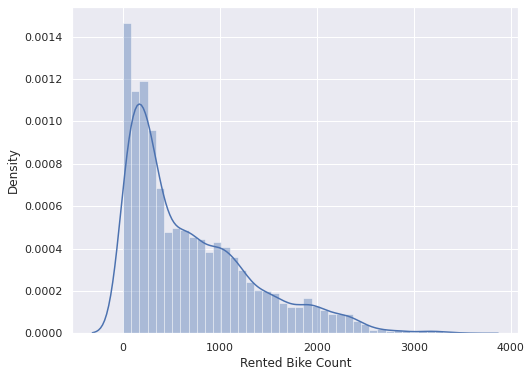

In [ ]:
# Dependent variable 'Rented Bike Count'

plt.figure(figsize=(8,6))
sns.distplot(bike_df['Rented Bike Count'],color="b")

* **The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**


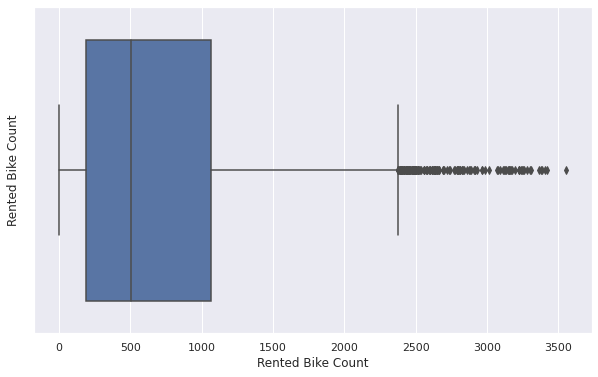

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=bike_df['Rented Bike Count'])
plt.show()

* **The above boxplot shows that we have detect outliers in Rented Bike Count column.**

In [ ]:
# Here are the nimerical features of our dataset

numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year'],
      dtype='object')

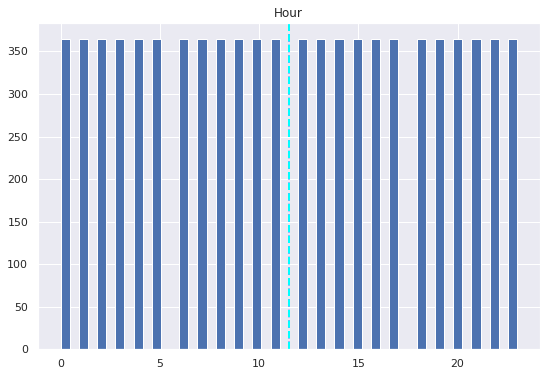

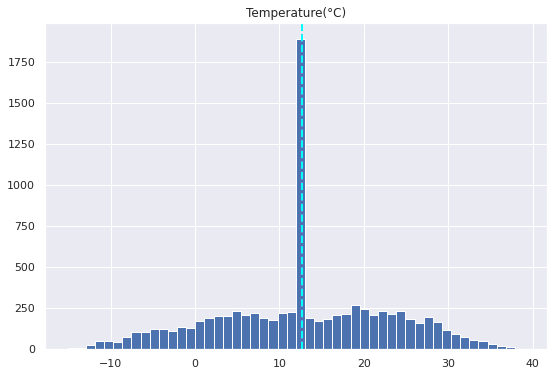

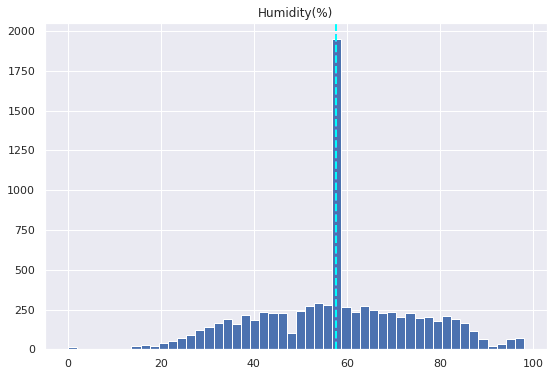

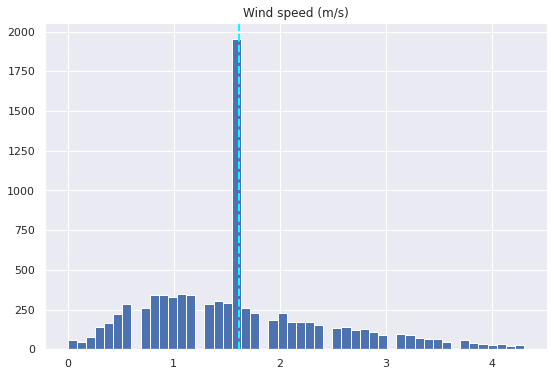

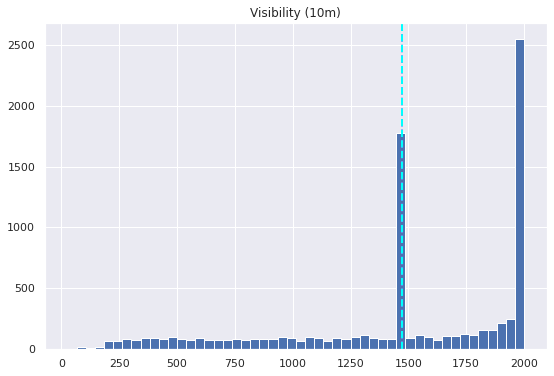

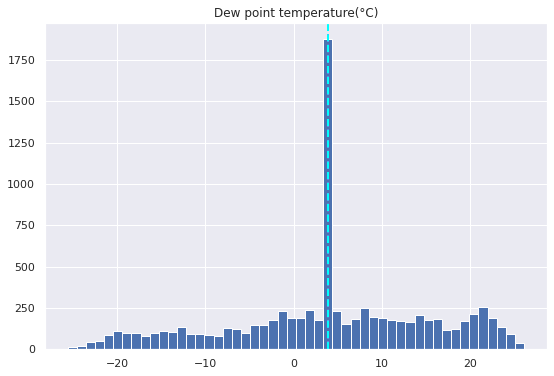

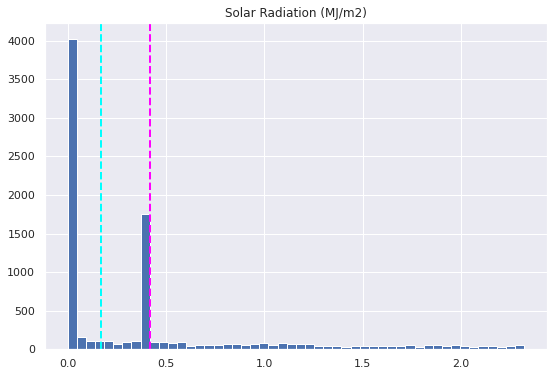

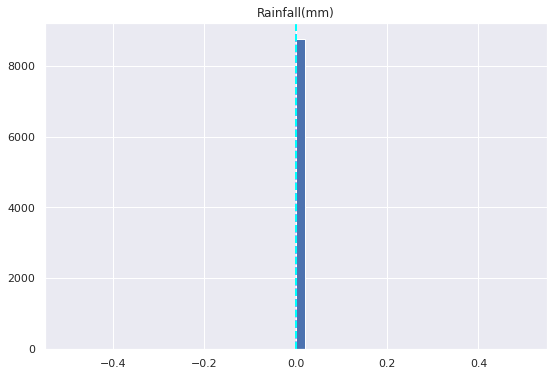

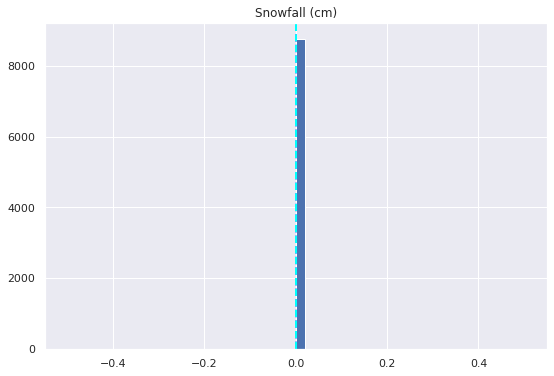

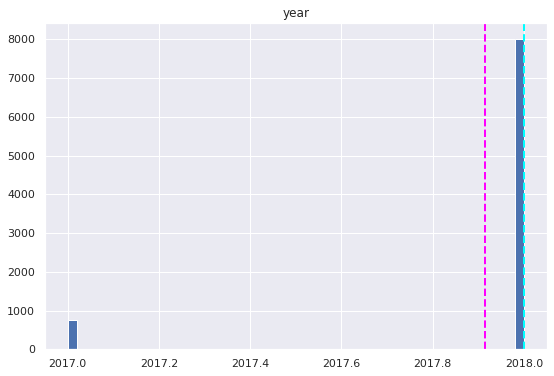

In [ ]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## **Regression plot**



* **The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**



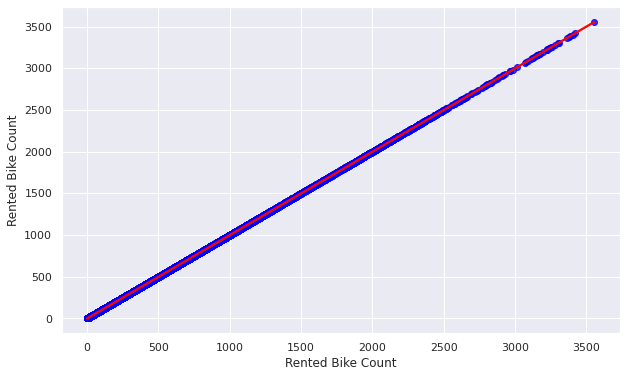

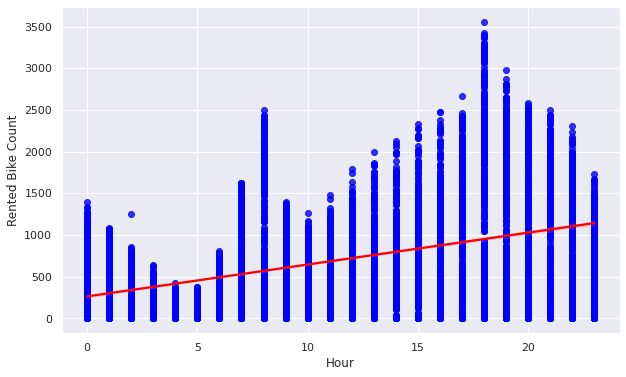

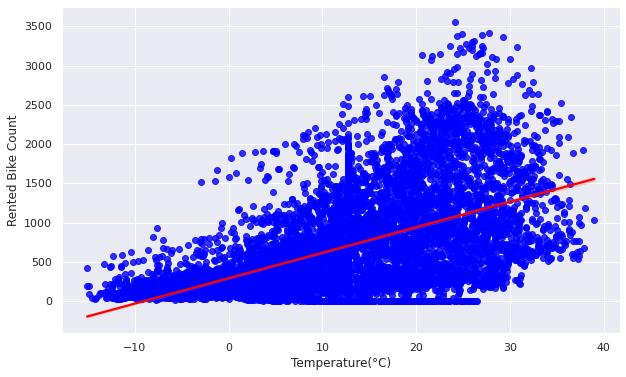

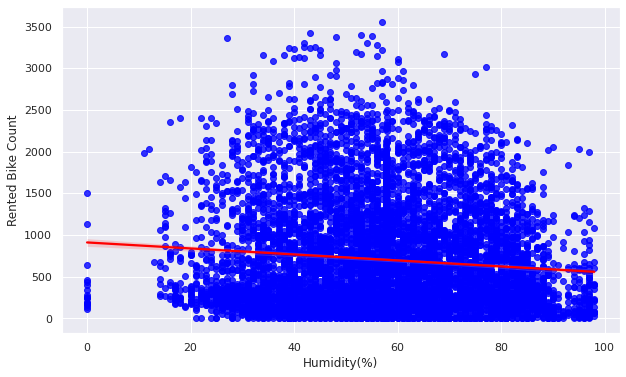

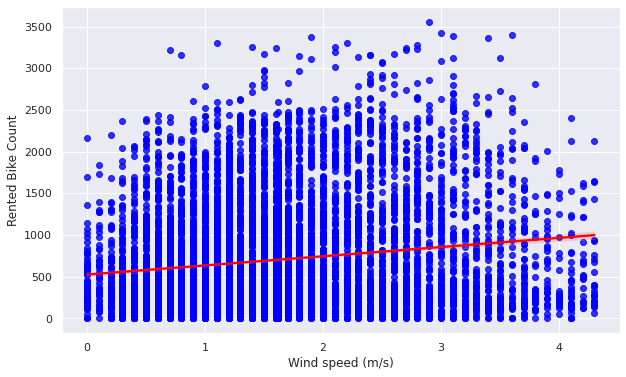

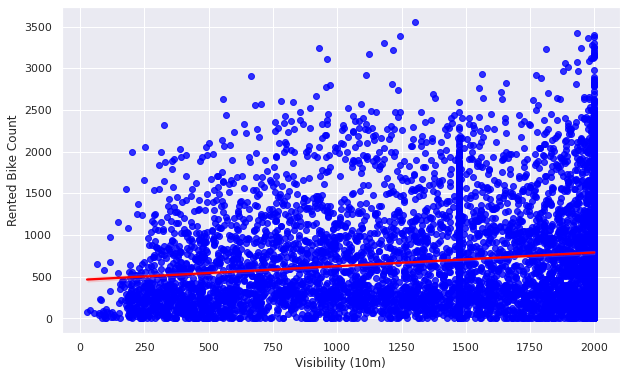

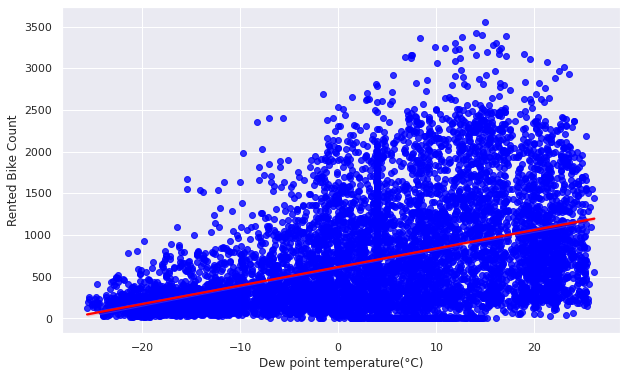

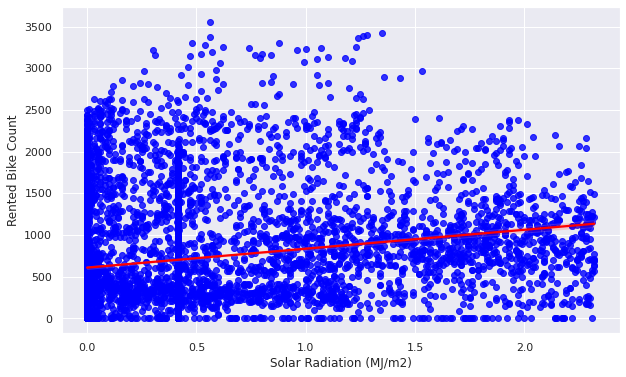

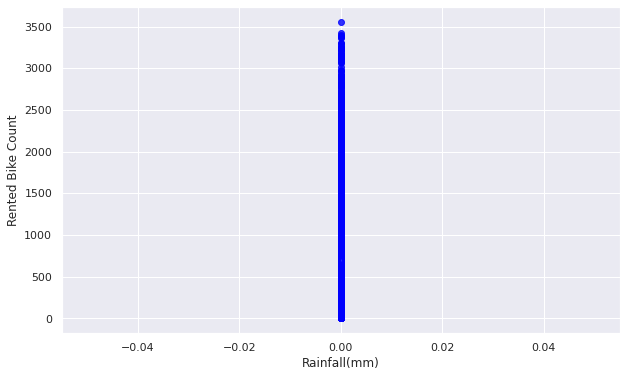

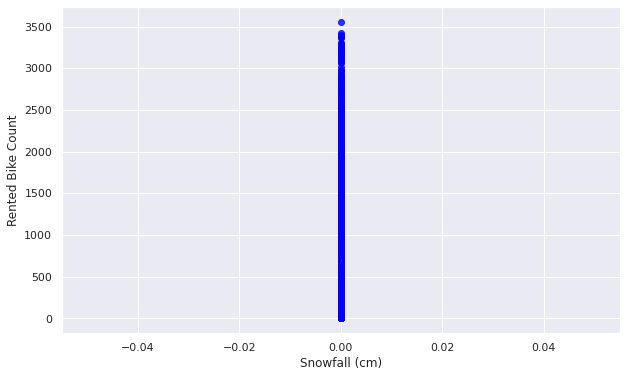

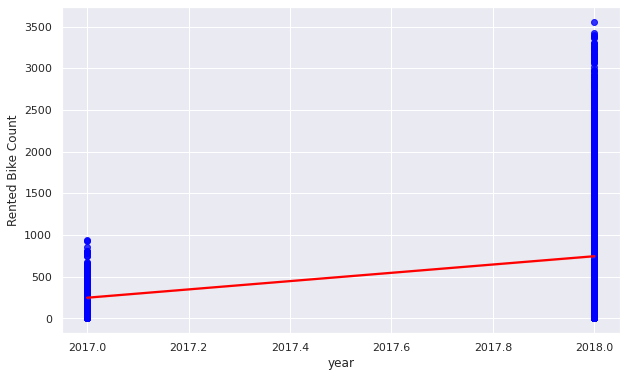

In [ ]:
# printing the regression plot

for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "red"})

# **sqrt transformation of target features**

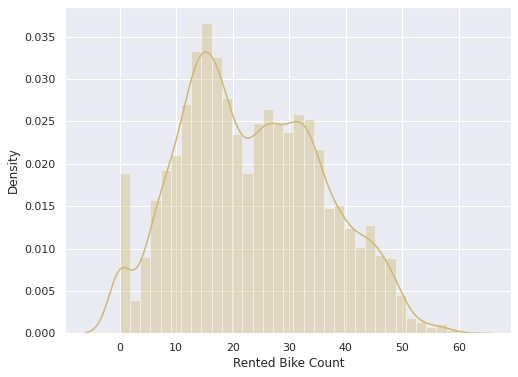

In [ ]:
# Applying square root to Rented Bike Count to improve skewness

plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']),color="y") # normalise 'Rented Bike Count' column data

* **Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**


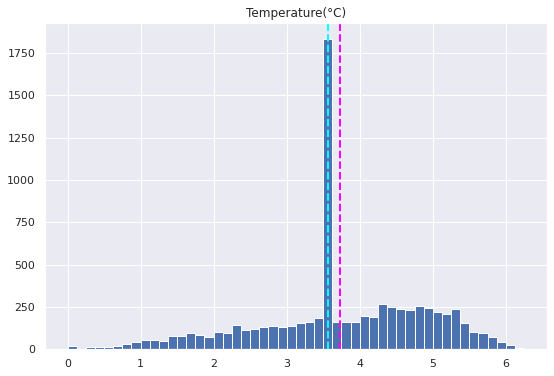

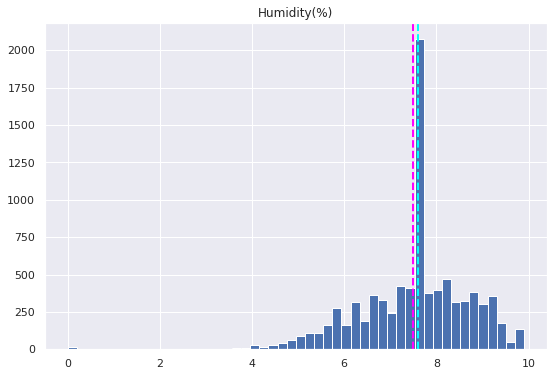

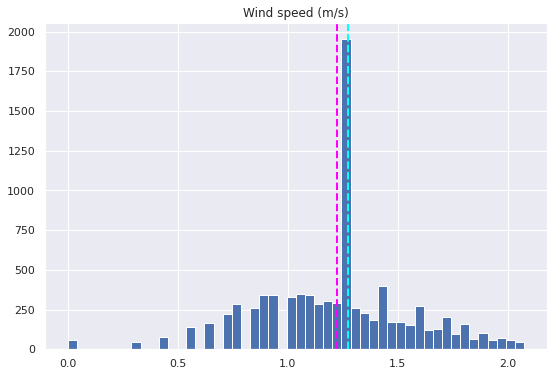

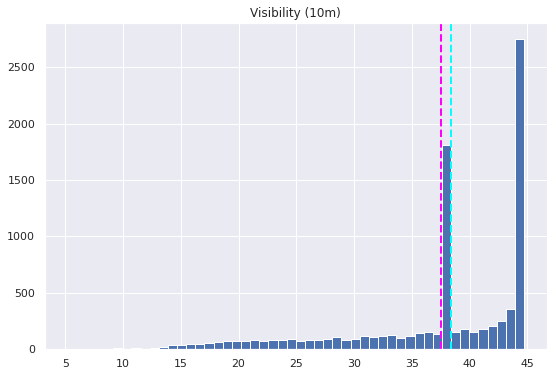

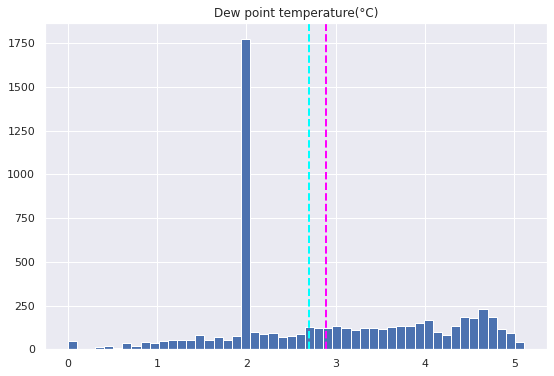

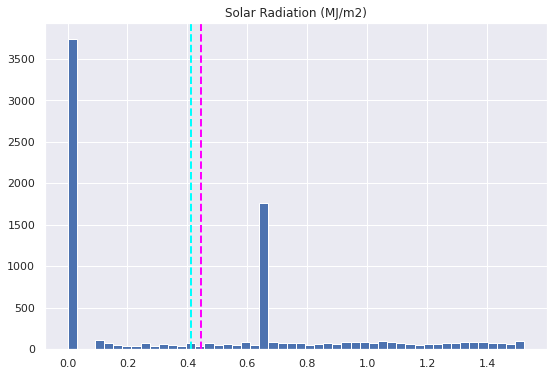

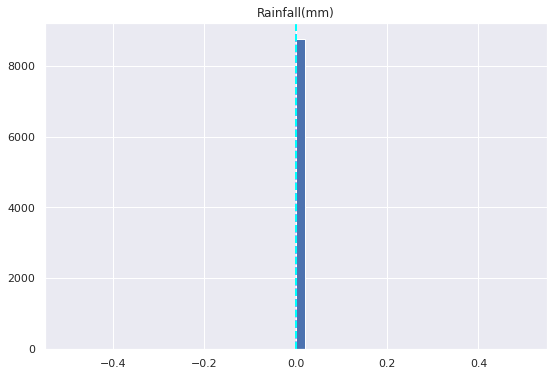

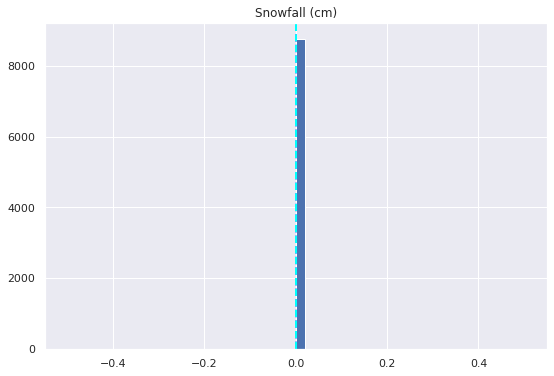

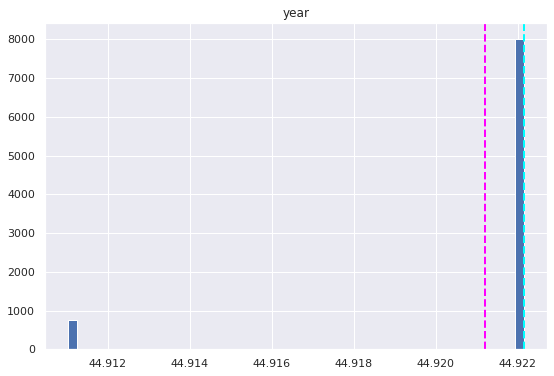

In [ ]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **Heatmap**

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.**

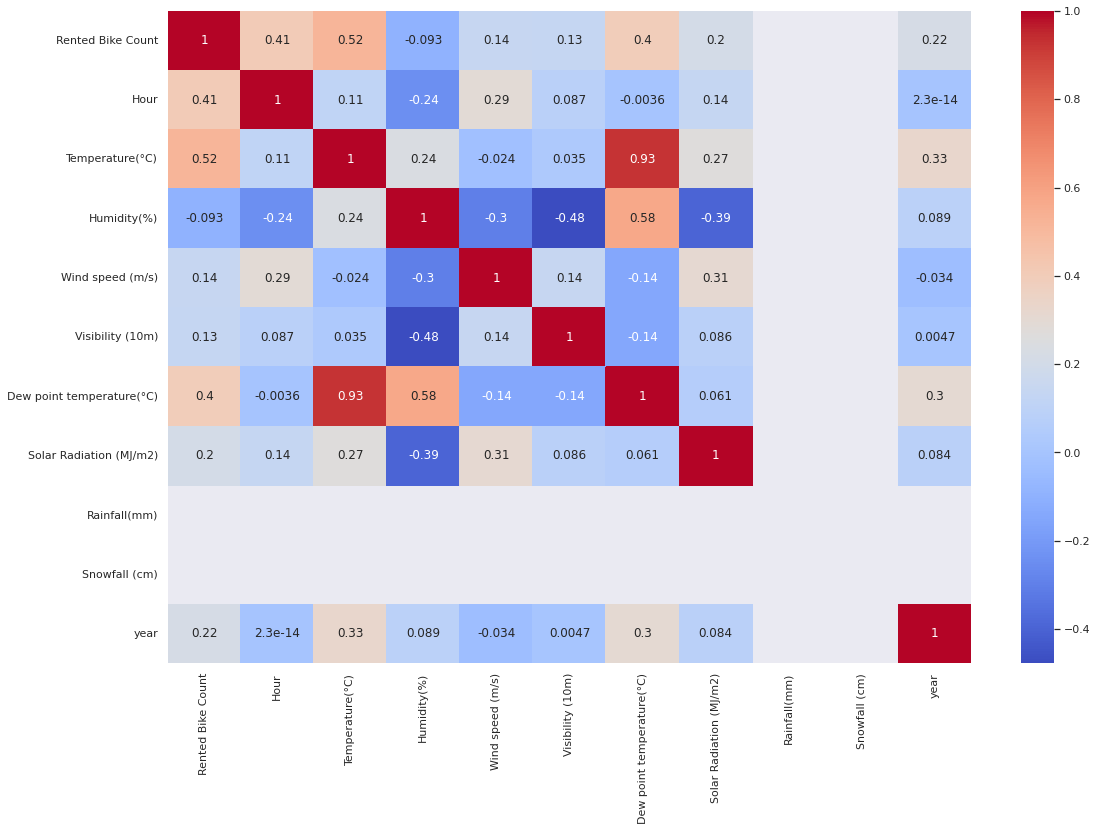

In [ ]:
# extracting correlation heatmap

plt.figure(figsize = (18,12))
sns.heatmap(bike_df.corr(), annot = True, cmap="coolwarm")
plt.show()


### **We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :**


* the temperature
* the dew point temperature 
* the solar radiation



* **From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.**





In [ ]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew point temperature(°C)'],axis=1)

# **Label Encoding**

In [ ]:
# creating dummy variables for categorical feature --> Seasons, month, DayOfWeek, year, fuctioning day, holiday

seasons = pd.get_dummies(bike_df['Seasons'])

working_day = pd.get_dummies(bike_df['Holiday'])

F_day = pd.get_dummies(bike_df['Functioning Day'])

month = pd.get_dummies(bike_df['month'])

week_day = pd.get_dummies(bike_df['Dayofweek'])

year = pd.get_dummies(bike_df['year'])

In [ ]:
bike_df = pd.concat([bike_df,seasons,working_day,F_day,month,week_day,year],axis=1)

In [ ]:
# checking the data dummy variable is created or not

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Sep,Fri,Mon,Sat,Sun,Thur,Tues,Wed,2017,2018
0,2017-12-01,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,2017-12-01,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,2017-12-01,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,2017-12-01,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,2017-12-01,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
## dropping columns for which dummy variables were created

bike_df.drop(['Seasons','Holiday','Functioning Day','Dayofweek','month','year'],axis=1,inplace=True)

In [ ]:
bike_df.drop(['Date'],axis=1,inplace=True) # droping date because we already extract the date from the data

In [ ]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = bike_df

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

                    feature   VIF
0         Rented Bike Count  2.23
1                      Hour  1.41
2           Temperature(°C)  3.98
3               Humidity(%)  2.35
4          Wind speed (m/s)  1.30
5          Visibility (10m)  1.75
6   Solar Radiation (MJ/m2)  1.62
7              Rainfall(mm)   NaN
8             Snowfall (cm)   NaN
9                    Autumn   inf
10                   Spring   inf
11                   Summer   inf
12                   Winter   inf
13               No Holiday  1.05
14                       No   inf
15                      Yes   inf
16                      Apr   inf
17                      Aug   inf
18                      Dec   inf
19                      Feb   inf
20                      Jan   inf
21                      Jul   inf
22                      Jun   inf
23                      Mar   inf
24                      May   inf
25                      Nov   inf
26                      Oct   inf
27                      Sep   inf
28            

In [ ]:
# Droping 'Rainfall' and 'Snowfall' column from the data

bike_df=bike_df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

**Droping 'Rainfall' and 'Snowfall' column from the data because there is NaN values in the columns after removing the outliers, so these column is not much important for our data so we can drop it.**

# **Fitting different models**

In [ ]:
#let's import the modules

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# **Model Training**
## Train Test split for regression
**Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.**

In [ ]:
#Assign the value in X and Y

X = bike_df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(bike_df['Rented Bike Count'])

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Autumn,Spring,Summer,Winter,...,Sep,Fri,Mon,Sat,Sun,Thur,Tues,Wed,2017,2018
0,0,-5.2,37.0,2.2,2000.0,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1,-5.5,38.0,0.8,2000.0,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,2,-6.0,39.0,1.0,2000.0,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,3,-6.2,40.0,0.9,2000.0,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,4,-6.0,36.0,2.3,2000.0,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#Creat test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=80)
print(X_train.shape)
print(X_test.shape)

(6132, 34)
(2628, 34)


In [ ]:
# scaling the data using min_max_scalar 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear regression model**
**Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line**

**Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable.**

In [ ]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:
# r2 score of train set

r2_linear_train = r2_score(y_train, Y_pred_train)

In [ ]:
r2_linear_train

0.6146645582827484

In [ ]:
r2_linear_test = r2_score(y_test, Y_pred_test)

In [ ]:
r2_linear_test

0.5957991915254117

In [ ]:
# different metrics used

MSE  = mean_squared_error(y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61.01007131955027
RMSE : 7.81089439946222
R2 : 0.5957991915254117
Adjusted R2 :  0.5904992194898792


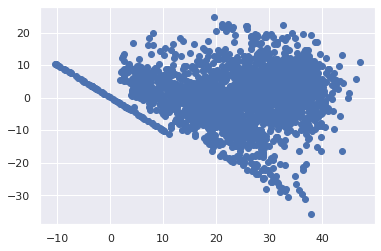

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_test),(y_test)-(Y_pred_test))

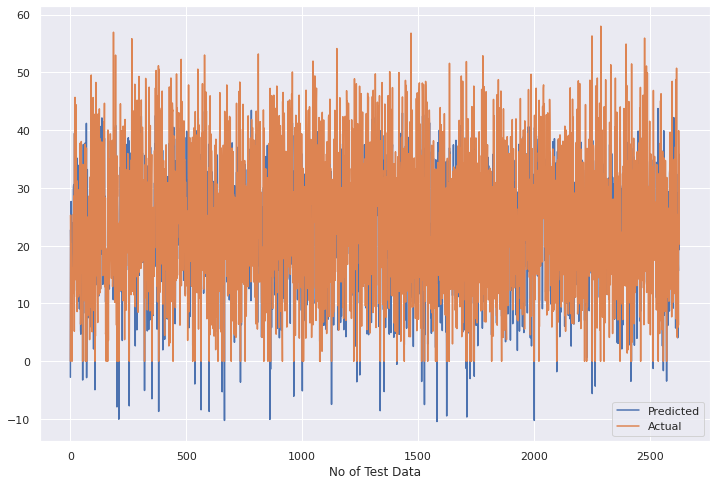

In [ ]:
# plotting results from above model

plt.figure(figsize=(12,8))
plt.plot((Y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION-(Regularised linear model)**

In [ ]:
### Cross validation ###

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 5, 8]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 8]})

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.01}


In [ ]:
# Fit the Lasso model
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.2547451723375066 0.23622915117836563


In [ ]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# different metrics used

MSE  = mean_squared_error(y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60.808578390387815
RMSE : 7.797985534122759
R2 : 0.597134112188638
Adjusted R2 :  0.5918516439334949


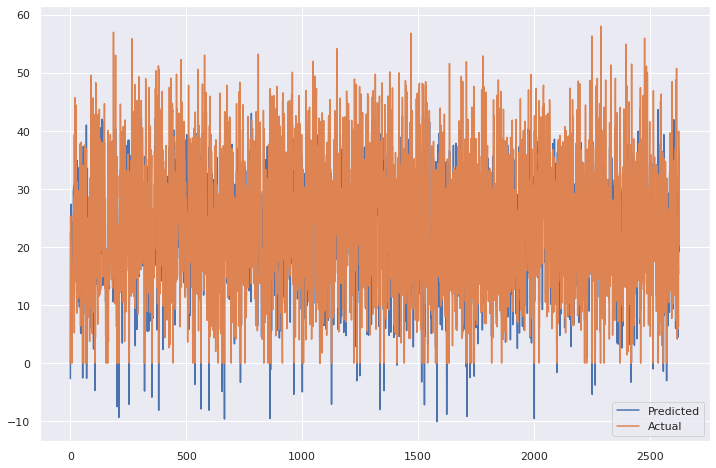

In [ ]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot(np.array(Y_pred_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

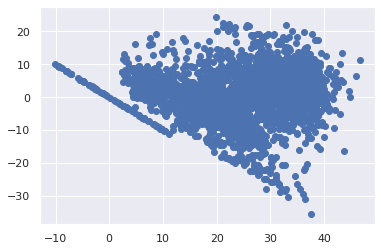

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_lasso),(y_test-Y_pred_lasso))

# **RIDGE REGRESSION-(Regularised linear model)**

In [ ]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.01,0.001,5,10,18,80,400]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.01, 0.001, 5, 10, 18, 80, 400]})

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 1}


In [ ]:
#check the score
ridge_regressor.score(X_train, y_train)

0.6146881666198456

In [ ]:
#get the X-test value

Y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# evaluating metrics

MSE  = mean_squared_error(y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60.95907107361799
RMSE : 7.807629030225373
R2 : 0.596137075749973
Adjusted R2 :  0.5918516439334949


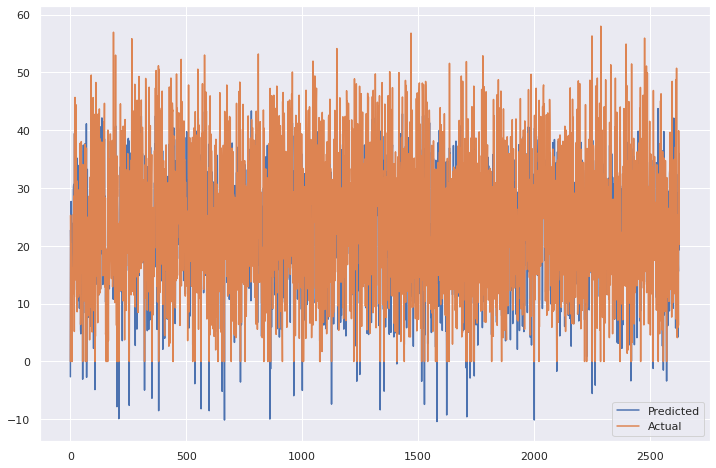

In [ ]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot((Y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

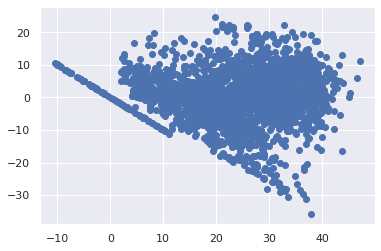

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_ridge),(y_test)-(Y_pred_ridge))

# **Decision-tree regression model**

In [ ]:
# training model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
Y_pred_train =regressor.predict(X_train)
Y_pred_train

array([30.90307428,  6.63324958, 16.70329309, ..., 13.11487705,
       11.53256259, 15.3622915 ])

In [ ]:
Y_pred_test = regressor.predict(X_test)
Y_pred_test

array([ 0.        , 20.02498439, 18.89444363, ..., 45.44227107,
       46.42197755, 23.        ])

In [ ]:
r2_score(Y_pred_train,y_train)

0.9823465740052276

In [ ]:
r2_score(Y_pred_test,y_test)

0.7925369340900443

In [ ]:
# Tunning the hyper perameters
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

regressor_gs_cv =GridSearchCV(regressor ,param,scoring='r2',cv=5)
regressor_gs_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [ ]:
#looking at the best estimator
regressor_gs_cv.best_estimator_

DecisionTreeRegressor(max_depth=15, random_state=0)

In [ ]:
#checking the score with best parameters
regressor_gs_cv.score(X_test,y_test)

0.8213013103059806

In [ ]:
print(f'The r2 score of decision tree is {r2_score(Y_pred_test,y_test)}')
print('\n')
print(f'the r2 score of decision tree with hyper perameteres tunning is {regressor_gs_cv.score(X_test,y_test)} ')

The r2 score of decision tree is 0.7925369340900443


the r2 score of decision tree with hyper perameteres tunning is 0.8213013103059806 


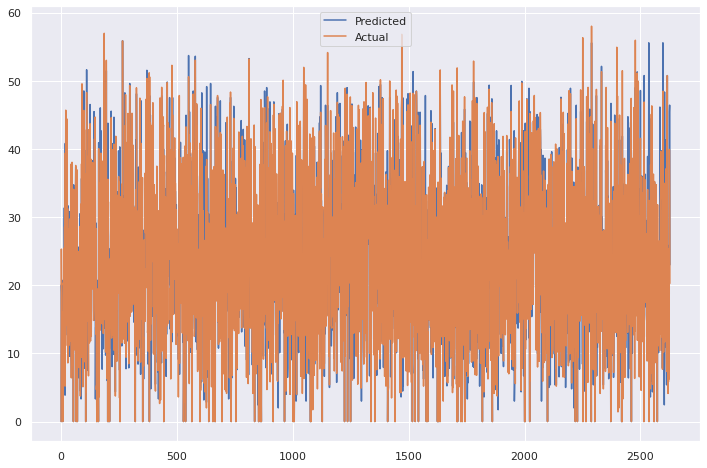

In [ ]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot((np.array(Y_pred_test)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

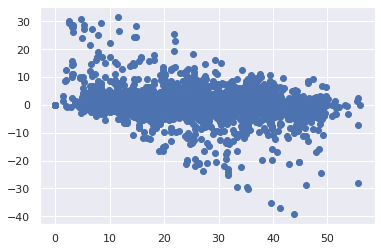

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_test),(y_test)-(Y_pred_test))

# **Random forest regression model**

In [ ]:
# Import the package
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
R_F_Algo = RandomForestRegressor()

In [ ]:
classifier = RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
parameters = grid_values = {'n_estimators':[10,20,50,70,100], 'max_depth':[3, 5, 7,9], 'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],}
classifier = GridSearchCV(classifier, param_grid = parameters, scoring = 'r2', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 50, 70, 100]},
             scoring='r2')

In [ ]:
Y_pred_train = classifier.predict(X_train)
Y_pred_test  = classifier.predict(X_test)

In [ ]:
r2_score(y_train, Y_pred_train)

0.8711639776744047

In [ ]:
random_forest_score = r2_score(y_test, Y_pred_test)

In [ ]:
# Score for test data random forest 

print(f"The best Random Forest R2 test score is : {random_forest_score} with n estimators = {classifier.best_params_['n_estimators']}, max depth : {classifier.best_params_['max_depth']}, min samples split : {classifier.best_params_['min_samples_split']} and min samples leaf : {classifier.best_params_['min_samples_leaf']}")


The best Random Forest R2 test score is : 0.8296958693179108 with n estimators = 100, max depth : 9, min samples split : 4 and min samples leaf : 2


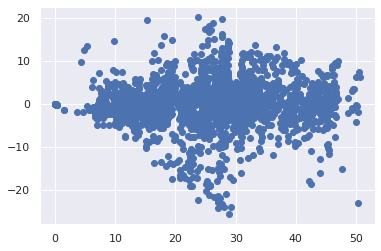

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_test),(y_test)-(Y_pred_test))

In [ ]:
R_F_Algo.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
R_F_Algo.feature_importances_

array([2.92893069e-01, 2.64208161e-01, 3.60612855e-02, 1.05469326e-02,
       9.16304078e-03, 5.33991833e-02, 1.16524617e-02, 2.74563521e-03,
       1.79901799e-03, 6.41810942e-02, 5.59556256e-03, 7.68405981e-02,
       9.19351858e-02, 2.71501670e-03, 3.78682967e-03, 2.89943284e-04,
       2.12049662e-04, 4.92285752e-04, 2.29696062e-03, 7.07951414e-03,
       5.83175248e-03, 4.20967053e-03, 1.67901609e-03, 2.04426571e-03,
       1.60500679e-03, 4.09207616e-03, 6.22065944e-03, 1.16976256e-02,
       1.43570511e-02, 2.74738029e-03, 3.69715341e-03, 3.43679176e-03,
       2.54563512e-04, 2.33159047e-04])

In [ ]:
importances = R_F_Algo.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Hour,0.29
1,Temperature(°C),0.26
12,Yes,0.09
11,No,0.08
9,Winter,0.06
5,Solar Radiation (MJ/m2),0.05
2,Humidity(%),0.04
4,Visibility (10m),0.01
6,Autumn,0.01
20,Mar,0.01


In [ ]:
features = X.columns
importances = R_F_Algo.feature_importances_
indices = np.argsort(importances)

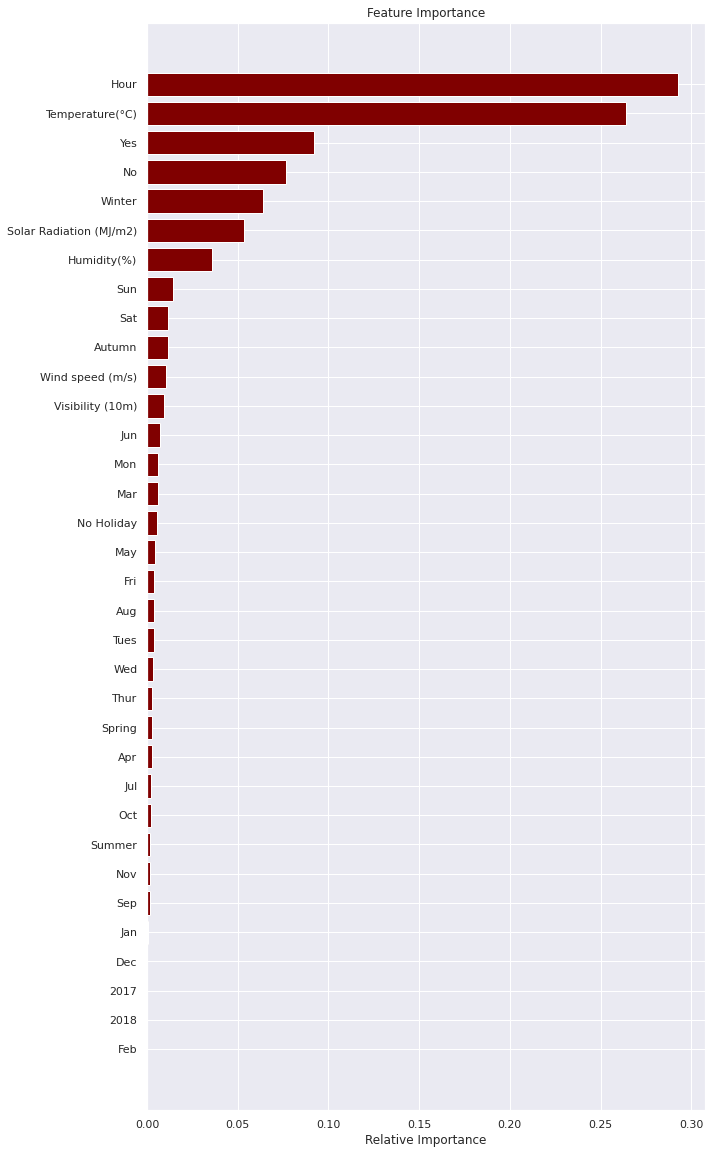

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**


In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model_1 = GradientBoostingRegressor()


gb_model_1.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model_1.predict(X_train)
y_pred_test_g = gb_model_1.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train_g)

0.8358240700918219

In [ ]:
gb_model_1 = r2_score(y_test, y_pred_test_g)

In [ ]:
gb_model_1

0.8059384264775082

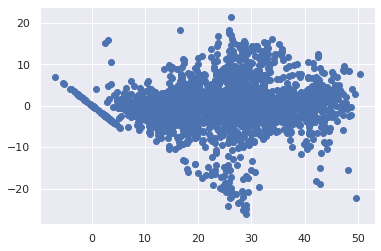

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model_1.feature_importances

AttributeError: ignored

In [ ]:
importances = gb_model_1.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

AttributeError: ignored

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Hour,0.29
1,Temperature(°C),0.26
2,Humidity(%),0.04
3,Wind speed (m/s),0.01
4,Visibility (10m),0.01


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Hour,0.29
1,Temperature(°C),0.26
12,Yes,0.09
11,No,0.08
9,Winter,0.06
5,Solar Radiation (MJ/m2),0.05
2,Humidity(%),0.04
4,Visibility (10m),0.01
6,Autumn,0.01
20,Mar,0.01


In [ ]:
features = X.columns
importances = gb_model_1.feature_importances_
indices = np.argsort(importances)

AttributeError: ignored

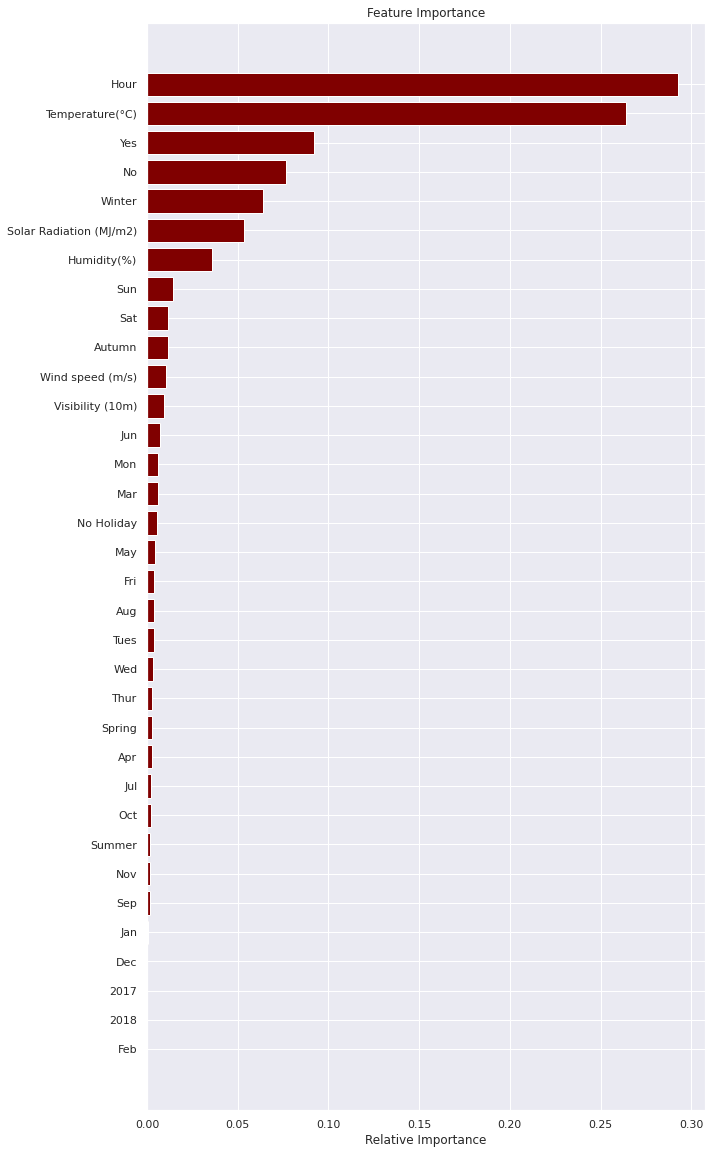

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Hyperparameter tuning**
Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

**Using GridSearchCV**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

## **Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
## Importing Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
## Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train_g_g)

0.9223371129175049

In [ ]:
 gb_gdcv =  r2_score(y_test, y_pred_g_g)

NameError: ignored

In [ ]:
gb_gdcv

NameError: ignored

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

NameError: ignored

In [ ]:
gb_optimal_model.feature_importances_

array([3.05580913e-01, 2.75678060e-01, 3.48950933e-02, 6.84310987e-03,
       6.16960179e-03, 5.76608777e-02, 1.10111231e-02, 3.14441389e-03,
       9.89289041e-04, 7.04823926e-02, 2.82625494e-03, 8.39068010e-02,
       9.49668986e-02, 6.93313732e-04, 2.12577398e-03, 1.31414952e-04,
       1.91661503e-05, 5.34988962e-04, 1.29556055e-03, 6.12044164e-03,
       3.90781709e-03, 1.77260993e-03, 2.47611696e-04, 2.29001026e-03,
       6.78895566e-04, 1.65049734e-03, 2.03784643e-03, 8.70485307e-03,
       1.11929154e-02, 3.50300189e-04, 8.49708297e-04, 4.69342330e-04,
       4.26273022e-04, 3.45831332e-04])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Hour,0.31
1,Temperature(°C),0.28
2,Humidity(%),0.03
3,Wind speed (m/s),0.01
4,Visibility (10m),0.01


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Hour,0.31
1,Temperature(°C),0.28
12,Yes,0.09
11,No,0.08
9,Winter,0.07
5,Solar Radiation (MJ/m2),0.06
2,Humidity(%),0.03
4,Visibility (10m),0.01
6,Autumn,0.01
19,Jun,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

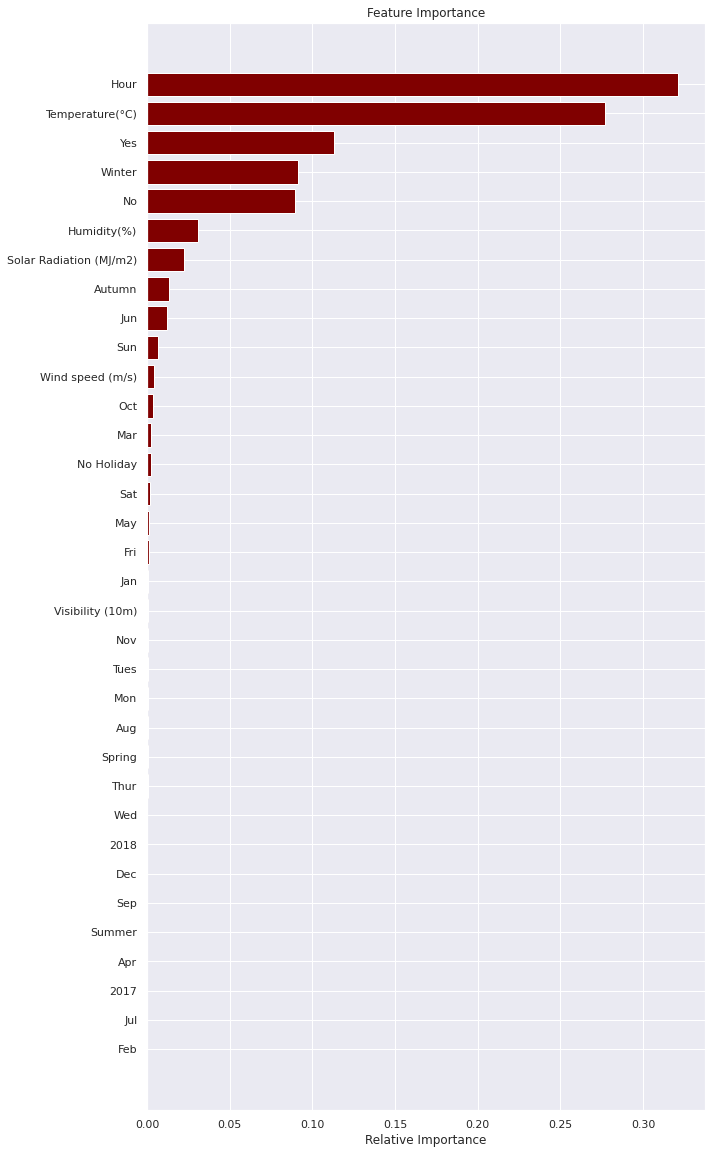

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **CONCLUSION**

**During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**


**Next we implemented 6 machine learning algorithms Linear Regression,lasso,ridge,decission tree, Random Forest and Gradientboosting. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:**

# **Result**

In [ ]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree Regressor','Decision Tree GridsearchCV','Random Forest Regressor','Gradient Boosting Regressor','Gradient Boosting Regressor(CV)']


In [ ]:
# creating a list of all model r2 score results from above

result_list = [r2_linear_test,r2_lasso_test,r2_ridge_test,r2_score(Y_pred_test,y_test),regressor_gs_cv.score(X_test,y_test),random_forest_score,gb_model_1,gb_gdcv]


In [ ]:
# creating an empty dataframe

results_df = pd.DataFrame()

In [ ]:
# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list

In [ ]:
# dataframe containing results from all the above models used

results_df

,model name,R2-score
0,Linear regression,0.595799
1,Lasso regression,0.597134
2,Ridge regression,0.596137
3,Decision Tree Regressor,0.787510
4,Decision Tree GridsearchCV,0.821301
5,Random Forest Regressor,0.830182
6,Gradient Boosting Regressor,0.805943
7,Gradient Boosting Regressor(CV),0.882374




**1. No overfitting is seen.**

**2. From above its clear that Gradient Boosting regressor(CV) model is the best model for this dataset.**

**3.  Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 83% and 88% recpectively for Test set.**

**4. Preprocessing the data was one of the difficult challenges we faced.**


**5. We were able to get relevant information from the dataset using exploratory data analysis.**

**6. We can deploy  Random forest Regressor and Gradient Boosting model.**


**However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.**



